### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### Instructions given in class: (11/07)
Steps to be followed:
1. read csv files
2. explore dataset
3. evaluation 
4. split 
5. scale
6. model
-GridSearchCV - best parameters
-train, test score

Proj 3 (If you need head start):
7. ensemble
8. dimension reduction - repeat step 4 to 7
9. Deep learning

In [75]:
%matplotlib notebook
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Dataset For Classification Task

In [2]:
Dataset_2 = pd.read_csv('Twitter-Absolute-Sigma-500.data', header = None)   #Reading Data For classification

In [3]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
0     140707 non-null int64
1     140707 non-null int64
2     140707 non-null int64
3     140707 non-null int64
4     140707 non-null int64
5     140707 non-null int64
6     140707 non-null int64
7     140707 non-null int64
8     140707 non-null int64
9     140707 non-null int64
10    140707 non-null int64
11    140707 non-null int64
12    140707 non-null int64
13    140707 non-null int64
14    140707 non-null float64
15    140707 non-null float64
16    140707 non-null float64
17    140707 non-null float64
18    140707 non-null float64
19    140707 non-null float64
20    140707 non-null float64
21    140707 non-null float64
22    140707 non-null float64
23    140707 non-null float64
24    140707 non-null float64
25    140707 non-null float64
26    140707 non-null float64
27    140707 non-null float64
28    140707 non-null int64
29    140707 non-null int64
30    140707 non-null

In [4]:
Dataset_2.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [5]:
#Dataset.columns
Dataset_2[77].unique().astype(int)   #Dependent variable

array([1, 0])

In [6]:
Dataset_2.isnull().sum().sum()    #No Missing values

0

In [7]:
Dataset_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [8]:
corr = Dataset_2.corr()    #calculate correlation matrix


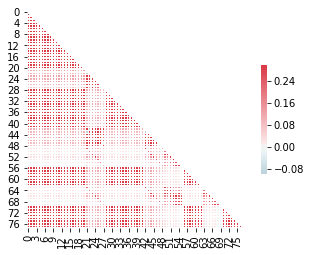

In [76]:

#Developing correlation plot

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
y = Dataset_2[77]
X_org = Dataset_2.drop([77], axis = 1)


In [11]:
y.sum()/y.count()

0.19739600730596205

**Above value shows that this dataset is biased. Which means accuracy may not a be good evaluation function. For the rest of this project we consider ``AUC`` as a scoring function.** 

**Taking Random sample with 10% data and pre-processing the data**

In [12]:
from sklearn.model_selection import train_test_split
_,sample_data, _, sample_target = train_test_split(X_org, y, shuffle = True, test_size = 0.1)


In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
X_train_unscaled , X_text_unscaled, y_train, y_test = train_test_split(sample_data, sample_target)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_text_unscaled)

MinMaxScaler rescales the data set such that all feature values are in the range [0,1] . So that it is standardized

In [16]:
from sklearn.model_selection import GridSearchCV

# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)
grid_knn.score(X_train, y_train)

0.9937240816296908

In [18]:
grid_knn.score(X_test, y_test)

0.9881345506345507

In [19]:
grid_knn.best_params_

{'n_neighbors': 20}

In [20]:
grid_knn.cv_results_['mean_test_score']

array([0.92260221, 0.9702089 , 0.97984543, 0.98323689, 0.9854525 ])

In [21]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [22]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.96 


In [23]:
train_score_list = []
test_score_list = []
x_range = [1, 5, 10, 15, 20]

for alpha in x_range: 
    model = KNeighborsClassifier(n_neighbors=alpha)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))
    

Text(0.5,0,'$\\alpha$')

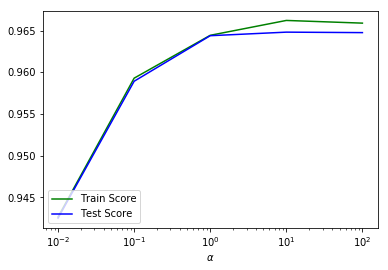

In [77]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')


In [25]:
report_table = [['knn', 'k = 20', grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test) ]]

# Linear SVM

In [26]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [27]:
grid_svc_lin.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [28]:
grid_svc_lin.best_params_

{'C': 10}

In [29]:
grid_svc_lin.cv_results_['mean_test_score']

array([0.97743359, 0.99015694, 0.99059817, 0.99162916, 0.9919385 ,
       0.99173187])

In [30]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train)
y_svc_lin_predict = grid_svc_lin.predict(X_test)

In [31]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LinearSVC(C=alpha)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

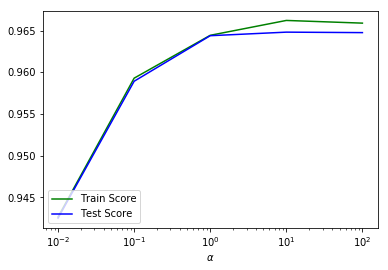

In [78]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [33]:
report_table = report_table + [['LinearSVC', 'C = 10', grid_svc_lin.score(X_train, y_train), grid_svc_lin.score(X_test, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), roc_auc_score(y_svc_lin_predict, y_test)]]

#  Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression


In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
clf.best_params_

{'C': 100}

In [37]:
clf.cv_results_['mean_test_score']

array([0.80346821, 0.83170662, 0.90997821, 0.95195679, 0.96238037,
       0.96550744])

In [38]:
y_log_predict_train = clf.predict(X_train)
y_log_predict = clf.predict(X_test)

In [39]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LogisticRegression(C=alpha)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

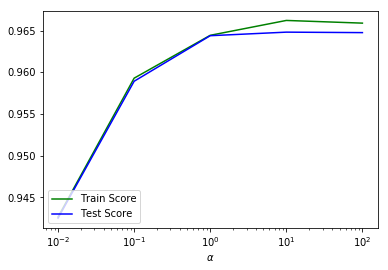

In [79]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [41]:
report_table = report_table + [['Logistic Regression', 'C = 100', clf.score(X_train, y_train), clf.score(X_test, y_test), roc_auc_score(y_log_predict_train, y_train), roc_auc_score(y_log_predict, y_test)]]

# Kernalized SVM

In [42]:
 from sklearn.svm import SVC
kernel = SVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_kernel = GridSearchCV(kernel, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [43]:
grid_kernel.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [44]:
grid_kernel.best_params_

{'C': 100}

In [45]:
grid_kernel.cv_results_['mean_test_score']

array([0.98978397, 0.98976922, 0.98974509, 0.98976034, 0.98996376,
       0.99061965])

In [46]:
y_ker_predict_train = grid_kernel.predict(X_train)
y_ker_predict = grid_kernel.predict(X_test)

In [47]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = SVC(C=alpha)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

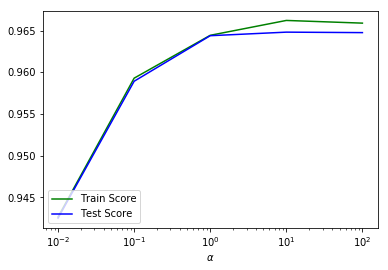

In [80]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [49]:
report_table = report_table + [['Kernalized SVM', 'C = 100', grid_kernel.score(X_train, y_train), grid_kernel.score(X_test, y_test), roc_auc_score(y_ker_predict_train, y_train), roc_auc_score(y_ker_predict, y_test)]]

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': np.arange(3, 10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv = 5, scoring='roc_auc', return_train_score=True)

In [51]:
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [52]:
tree.best_params_

{'max_depth': 4}

In [53]:
tree.cv_results_['mean_test_score']

array([0.98354444, 0.98459662, 0.97770307, 0.9664924 , 0.95247299,
       0.93652334, 0.93683623])

In [54]:
y_tree_predict_train = tree.predict(X_train)
y_tree_predict = tree.predict(X_test)

In [55]:
train_score_list = []
test_score_list = []
x_range = np.arange(3, 10)

for alpha in x_range: 
    model = DecisionTreeClassifier(max_depth=alpha)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

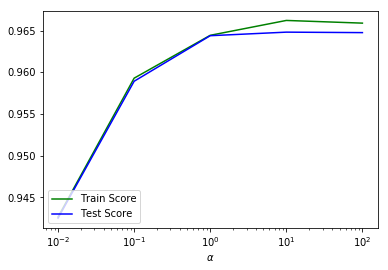

In [81]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [57]:
report_table = report_table + [['Decision Tree', 'd = 4', tree.score(X_train, y_train), tree.score(X_test, y_test), roc_auc_score(y_tree_predict_train, y_train), roc_auc_score(y_tree_predict, y_test)]]

In [58]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])

In [59]:
report.index = report['Model name']

In [60]:
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
knn,knn,k = 20,0.993724,0.988135,0.956491,0.960654
LinearSVC,LinearSVC,C = 10,0.992865,0.993405,0.959129,0.966063
Logistic Regression,Logistic Regression,C = 100,0.967308,0.968732,0.958571,0.963571
Kernalized SVM,Kernalized SVM,C = 100,0.991152,0.991533,0.957230,0.957388
Decision Tree,Decision Tree,d = 4,0.988685,0.984661,0.956116,0.950319


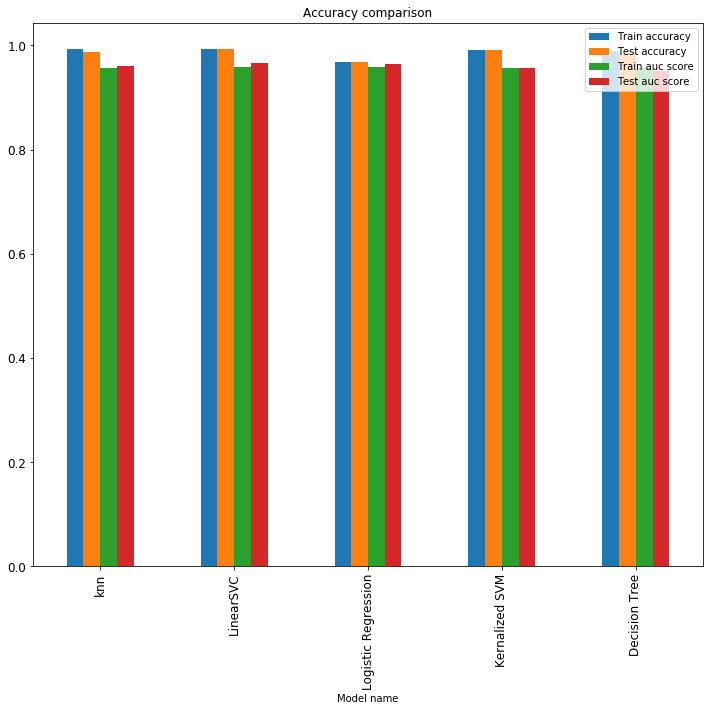

In [86]:
#report.plot(legend=2,kind='bar',figsize=(8, 7));
ax = report[['Train accuracy','Test accuracy','Train auc score', 'Test auc score' ]].plot(kind='bar', title ="Accuracy comparison", figsize=(12, 10), fontsize=12)
plt.show()


**From the Above chart and Report table, we conclude that Linear SVC is the best model for the data based on the accuracy.**

# FINAL MODEL

**Training Whole Dataset using Linear SVC**

In [62]:
y = Dataset_2[77]
X_org = Dataset_2.drop([77], axis = 1)

In [63]:
X_train_unscaled , X_text_unscaled, y_train, y_test = train_test_split(X_org, y)

In [64]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_text_unscaled)

In [65]:
svc_lin = LinearSVC(C=10)
svc_lin.fit(X_train, y_train)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Predicting values for the test dataset
predict = svc_lin.predict(X_test)

#Calulate RMSE Value
rmse = sqrt(mean_squared_error(y_test, predict))

print('RMSE:', rmse)
print('Train score: {:.4f}'.format(svc_lin.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svc_lin.score(X_test, y_test)))

RMSE: 0.18880755524784607
Train score: 0.9657
Test score: 0.9644


**We obtained Training accuracy of 96.5% and Testing accuracy of 96.5% on the whole dataset using Linear SVC**

**We Predicted values for Y_test and obtained RMSE of 0.19**


In [67]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lins = LinearSVC(C=alpha)
    lins.fit(X_train,y_train)
    train_score_list.append(lins.score(X_train,y_train))
    test_score_list.append(lins.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

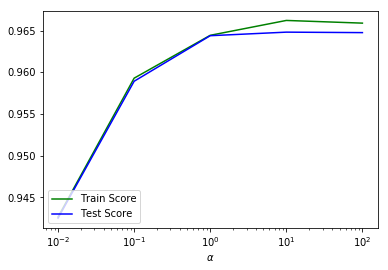

In [83]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
